## Assignment Objective

In this assignment, we work with two dataframes, df1 and df2, both featuring a column named "RM". Our task involves cleaning these dataframes separately, followed by merging them to maximize the number of unique matched rows. Subsequently, we utilize the resulting cleaned data alongside GIS data of Saskatchewan to generate a map visualizing yields.


In [1]:
# Displaying Assignment Details with Local Time and Computer ID

import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solved by Abel Soltani') # Please change your name here
print('Local Time:', local_time)
#print('Computer ID:', computer_id)


Assignment 1: Solved by Abel Soltani
Local Time: 2024-05-13 01:19:44


## Data Extraction

In [2]:
# import numpy as np  # Numerical computing library for handling arrays and matrices
import pandas as pd  # Data manipulation and analysis library
import seaborn as sns  # Statistical data visualization based on matplotlib
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import geopandas as gpd  # Library for working with geospatial data (based on pandas and shapely)


In [3]:
import os  # Import the os module for path manipulation

# Define the main directory path
main_path = '/Users/abels/Desktop/Pallet Skills/Courses/Stream 3/'

# Concatenate the main directory path with the filenames to get the full file paths
df_1_path = os.path.join(main_path, 'df_1.csv')
df_2_path = os.path.join(main_path, 'df_2.csv')

# Read the CSV files into pandas DataFrames
df1 = pd.read_csv(df_1_path)
df2 = pd.read_csv(df_2_path)


In [4]:
print(df1.head(10))
print("%" * 40)
print(df1.info())


                 RM
0          WINNIPEG
1  BIFROST-RIVERTON
2  EMERSON-FRANKLIN
3          ROCKWOOD
4         ARMSTRONG
5             GIMLI
6     WEST ST. PAUL
7       SPRINGFIELD
8       ST CLEMENTS
9        ST ANDREWS
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RM      477 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB
None


## DataFrame Comparison and Analysis Functions

In [5]:
def print_unique_rm(df, df_name, column_name):
    """
    Print the count of unique values in a specified column of a dataframe.

    Args:
    df (DataFrame): The dataframe to analyze.
    df_name (str): Name of the dataframe.
    column_name (str): Name of the column to analyze.
    """
    unique_rm_count = df[column_name].nunique()
    print(f'Unique values in column "{column_name}" of {df_name}: {unique_rm_count}')

def compare(df1, df2, df3, column_name):
    """
    Process and compare unique values in a specified column of two dataframes.

    Args:
    df1 (DataFrame): The first dataframe.
    df2 (DataFrame): The second dataframe.
    df3 (DataFrame): The third dataframe.
    column_name (str): Name of the column to analyze.
    
    Returns:
    set: Set of unique values from df3 that are not present in the merged dataframe of df1 and df2.
    """
    # Print unique counts
    print_unique_rm(df1, 'df1', column_name)
    print_unique_rm(df2, 'df2', column_name)
    
    # Merge dataframes and print unique count after merging
    merged_df = pd.merge(df1, df2, on=column_name)
    merged_rm_count = merged_df[column_name].nunique()
    print('After Merging:', merged_rm_count)
    
    # Calculate and print the set of cleaned values from df3 that are not present in the merged dataframe
    set_difference = set(df3[column_name].unique()) - set(merged_df[column_name].unique())
    print('Set Difference Size:', len(set_difference))
    
    return set_difference

column_name = 'RM'
compare(df1, df2, df2, column_name)


Unique values in column "RM" of df1: 477
Unique values in column "RM" of df2: 464
After Merging: 421
Set Difference Size: 43


{'278',
 'Acadia',
 'Badlands',
 'Birch Hills',
 'Bonnyville',
 'Brazeau',
 'Clear Hills',
 'Clearwater',
 'Cypress',
 'EAST ST PAUL',
 'Edmonton',
 'Fairview',
 'Forty Mile',
 'Greenview',
 'HILLSBURG-ROBLIN-SHELL RIVER',
 'Lac La Biche',
 'Lac Ste. Anne County',
 'Lesser Slave River',
 'Mackenzie',
 'Northern Sunrise',
 'Opportunity',
 'Parkland County',
 'Peace',
 'ST. ANDREWS',
 'ST. CLEMENTS',
 'STE. ANNE',
 'Saddle Hills',
 'Saskatchewan',
 'Smoky Lake',
 'Smoky River',
 'Special Area 02',
 'Special Area 03',
 'Spirit River',
 'St. Paul',
 'Strathcona County',
 'Taber',
 'Thorhild',
 'Two Hills',
 'UNORG TERRITORY',
 'Warner',
 'Westlock',
 'Woodlands County',
 'Yellowhead County'}

In [6]:
column_name = 'RM'
compare(df1, df2, df1, column_name)


Unique values in column "RM" of df1: 477
Unique values in column "RM" of df2: 464
After Merging: 421
Set Difference Size: 56


{' Two Hills\t',
 ' Warner',
 '521',
 'ATHABASCA',
 'BIRCH HILLS ',
 'BRANDON',
 'BRAZEAU ',
 'CLEAR HILLS ',
 'CLEARWATER ',
 'CYPRESS ',
 'Cardston ',
 'DALLAS/RED ROSE',
 'Forty Mile\t',
 'HARWILL',
 'HOMEBROOK-PEONAN POINT',
 'I.D. NO. 13 (ELK ISLAND)',
 'I.D. NO. 4 (WATERTON)',
 'KANANASKIS IMPROVEMENT DISTRICT',
 'LAC LA BICHE ',
 'LAC STE. ANNE ',
 'MACKENZIE ',
 'MEADOW PORTAGE',
 'MUNICIPAL DISTRICT OF ACADIA NO. 34',
 'MUNICIPAL DISTRICT OF BIGHORN NO. 8',
 'MUNICIPAL DISTRICT OF BONNYVILLE NO. 87',
 'MUNICIPAL DISTRICT OF FAIRVIEW NO. 136',
 'MUNICIPAL DISTRICT OF GREENVIEW NO. 16',
 'MUNICIPAL DISTRICT OF LESSER SLAVE RIVER NO. 124',
 'MUNICIPAL DISTRICT OF OPPORTUNITY NO. 17',
 'MUNICIPAL DISTRICT OF PEACE NO. 135',
 'MUNICIPAL DISTRICT OF RANCHLAND NO. 66',
 'MUNICIPAL DISTRICT OF SMOKY RIVER NO. 130',
 'MUNICIPAL DISTRICT OF SPIRIT RIVER NO. 133',
 'MUNICIPAL DISTRICT OF TABER',
 'MUNICIPALITY OF CROWSNEST PASS',
 'NORTHERN SUNRISE ',
 'PARKLAND ',
 'PINAWA',
 'ROBLIN',


## Functions for cleaning and extracting municipality and handling special areas names

In [7]:
import re

def extract_municipality_name(string):
    """
    Extracts the municipality name from a string containing municipality information.

    Args:
    string (str): The string containing municipality information.

    Returns:
    str: The extracted municipality name.
    """
    if 'MUNICIPAL DISTRICT OF' in string:
        return string.split('MUNICIPAL DISTRICT OF ')[1].split(' NO')[0]
    elif 'MUNICIPALITY OF' in string:
        return string.split('MUNICIPALITY OF ')[1]
    else:
        return string

def clean_and_extract(df, column_name='RM', new_column_name='New_RM'):
    """
    Clean and extract municipality names from a specified column in a DataFrame.

    Args:
    df (DataFrame): The DataFrame containing the data.
    column_name (str, optional): Name of the column to clean and extract municipality names from. Default is 'RM'.
    new_column_name (str, optional): Name of the new column to store the cleaned and extracted municipality names. Default is 'New_RM'.

    Returns:
    DataFrame: The cleaned and extracted DataFrame.
    """
    # Clean and standardize the column containing municipality names
    df[column_name] = df[column_name].str.upper().str.replace('.', '').str.replace('COUNTY','').str.replace(r'\W+', '').str.strip()
    
    # Extract municipality names
    df[new_column_name] = df[column_name].apply(lambda x: extract_municipality_name(str(x)))
    
    # Handle special areas
    pattern = r'SPECIAL AREAS NO (\d+)'
    df[new_column_name] = df[new_column_name].apply(lambda x: 'SPECIAL AREA ' + re.match(pattern, x).group(1).zfill(2) if re.match(pattern, x) else x)
    
    # Drop duplicates after cleaning and extracting
    df.drop_duplicates(subset=[new_column_name], keep='first', inplace=True)
    
    return df

df1_cleaned = clean_and_extract(df1)
df1_cleaned[400:420]


,RM,New_RM
400,142,142
401,232,232
402,CYPRESS,CYPRESS
403,SPECIAL AREAS NO 2,SPECIAL AREA 02
404,MUNICIPAL DISTRICT OF ACADIA NO 34,ACADIA
405,SPECIAL AREAS NO 3,SPECIAL AREA 03
406,SPECIAL AREA 04,SPECIAL AREA 04
407,PROVOST,PROVOST
408,WAINWRIGHT,WAINWRIGHT
409,VERMILION RIVER,VERMILION RIVER


In [9]:
df2_cleaned = clean_and_extract(df2)
df2_cleaned[400:420]


,RM,New_RM
400,REYNOLDS,REYNOLDS
401,RHINELAND,RHINELAND
402,RIDING MOUNTAIN WEST,RIDING MOUNTAIN WEST
403,RITCHOT,RITCHOT
404,RIVERDALE,RIVERDALE
405,ROCKWOOD,ROCKWOOD
406,ROLAND,ROLAND
407,ROSEDALE,ROSEDALE
408,ROSSBURN,ROSSBURN
409,ROSSER,ROSSER


In [12]:
def process_and_compare(df1, df2, df3, column_name):
    """
    Process and compare two dataframes.

    Args:
    df1 (DataFrame): The first dataframe.
    df2 (DataFrame): The second dataframe.
    df3 (DataFrame): The third dataframe.

    Returns:
    set: Set of cleaned values from df3 that are not present in the merged dataframe of df1 and df2.
    """
    # Clean and extract municipality names from both dataframes
    df1_cleaned = clean_and_extract(df1)
    df2_cleaned = clean_and_extract(df2)
    
    # Print unique counts
    print_unique_rm(df1_cleaned, 'df1_cleaned', column_name)
    print_unique_rm(df2_cleaned, 'df2_cleaned', column_name)
    
    # Merge dataframes and print unique count after merging
    merged_df = pd.merge(df2_cleaned, df1_cleaned, on=column_name)
    merged_rm_count = merged_df[column_name].nunique()
    print('After Merging:', merged_rm_count)
    
    # Calculate and print the set of cleaned values from df3 that are not present in the merged dataframe
    set_difference = set(df3[column_name].unique()) - set(merged_df[column_name].unique())
    print('Set Difference Size:', len(set_difference))
    
    return set_difference

column_name='New_RM'

process_and_compare(df1_cleaned, df2_cleaned , df2_cleaned, column_name)


Unique values in column "New_RM" of df1_cleaned: 473
Unique values in column "New_RM" of df2_cleaned: 462
After Merging: 455
Set Difference Size: 7


{'278',
 'BADLANDS',
 'EAST ST PAUL',
 'EDMONTON',
 'HILLSBURG-ROBLIN-SHELL RIVER',
 'SASKATCHEWAN',
 'UNORG TERRITORY'}

In [13]:
process_and_compare(df1_cleaned, df2_cleaned , df1_cleaned, column_name)


Unique values in column "New_RM" of df1_cleaned: 473
Unique values in column "New_RM" of df2_cleaned: 462
After Merging: 455
Set Difference Size: 18


{'521',
 'BIGHORN',
 'BRANDON',
 'CROWSNEST PASS',
 'DALLAS/RED ROSE',
 'HARWILL',
 'HOMEBROOK-PEONAN POINT',
 'ID NO 13 (ELK ISLAND)',
 'ID NO 4 (WATERTON)',
 'KANANASKIS IMPROVEMENT DISTRICT',
 'MEADOW PORTAGE',
 'PINAWA',
 'RANCHLAND',
 'ROBLIN',
 'SALT POINT',
 'ST LAURENT',
 'VIRDEN',
 'WATERHEN'}

In [14]:
# Merge the cleaned municipality name columns from two DataFrames
cleaned_df = pd.merge(df1_cleaned['New_RM'], df2_cleaned['New_RM'], on='New_RM')
cleaned_df.head(10)


,New_RM
0,WINNIPEG
1,BIFROST-RIVERTON
2,EMERSON-FRANKLIN
3,ROCKWOOD
4,ARMSTRONG
5,GIMLI
6,WEST ST PAUL
7,SPRINGFIELD
8,ST CLEMENTS
9,ST ANDREWS


In [16]:
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   New_RM  455 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB
None


## Cleaning and Converting 'New_RM' Column to Integer Type

In [17]:
# Convert the 'New_RM' column in cleaned_df to numeric, replacing non-numeric values with NaN
cleaned_df['New_RM'] = pd.to_numeric(cleaned_df['New_RM'], errors='coerce')

# Drop rows with NaN values in the 'New_RM' column
cleaned_df = cleaned_df.dropna(subset=['New_RM'])

# Convert the 'New_RM' column in cleaned_df to integer type
cleaned_df['New_RM'] = cleaned_df['New_RM'].astype(int)


In [18]:
cleaned_df.head(20).T

,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
New_RM,1,31,61,91,121,151,152,181,211,241,271,301,331,394,2,32,92,122,3,33


## Loading Yield and GIS Data for Rural Municipalities

In [19]:
# Define the main directory path
main_path = '/Users/abels/Desktop/Pallet Skills/Courses/Stream 3/'

# Load yield data for rural municipalities
rm_yields_path = main_path + 'rm-yields-data.csv'

# Load GIS shapefile data for rural municipalities
gis_path = main_path + 'RM_shapefile/RuralMunicipality.shp'

# Read yield data into a DataFrame
df_rm_yields = pd.read_csv(rm_yields_path)

# Read GIS shapefile data into a GeoDataFrame
gdf_rm = gpd.read_file(gis_path)


<Axes: >

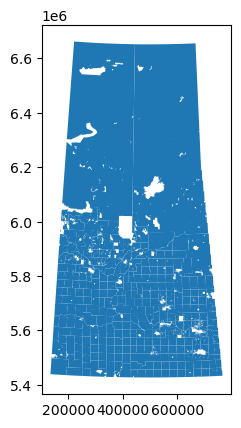

In [20]:
gdf_rm.plot()


In [21]:
#Selection of Major Crop Data from Yield DataFrame
df_major_crops= df_rm_yields[['Year', 'RM', 'Canola', 'Spring Wheat', 'Durum','Oats', 'Lentils', 'Peas', 'Barley']]
df_major_crops


,Year,RM,Canola,Spring Wheat,Durum,Oats,Lentils,Peas,Barley
0,1938,1,NaN,4.0,NaN,1.0,NaN,NaN,1.0
1,1939,1,NaN,9.0,NaN,16.0,NaN,NaN,16.0
2,1940,1,NaN,12.0,NaN,23.0,NaN,NaN,19.0
3,1941,1,NaN,18.0,NaN,32.0,NaN,NaN,28.0
4,1942,1,NaN,20.0,NaN,35.0,NaN,NaN,28.0
...,...,...,...,...,...,...,...,...,...
25602,2019,622,46.1,63.9,NaN,106.0,NaN,33.7,73.9
25603,2020,622,40.9,55.1,NaN,94.5,NaN,49.2,74.3
25604,2021,622,23.9,17.0,NaN,25.8,NaN,NaN,23.3
25605,2022,622,44.4,66.8,NaN,93.0,NaN,NaN,76.9


In [22]:
df_rm_yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25607 non-null  int64  
 1   RM            25607 non-null  int64  
 2   Winter Wheat  3104 non-null   float64
 3   Canola        14588 non-null  float64
 4   Spring Wheat  25498 non-null  float64
 5   Mustard       4680 non-null   float64
 6   Durum         11926 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          24348 non-null  float64
 9   Lentils       5907 non-null   float64
 10  Peas          8703 non-null   float64
 11  Barley        25272 non-null  float64
 12  Fall Rye      15914 non-null  float64
 13  Canary Seed   3941 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          21310 non-null  float64
 17  Chickpeas     1296 non-null   float64
dtypes: float64(16), int64(2)
m

In [23]:
df_major_crops.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,25607.0,1980.379310,24.799668,1938.0,1959.0,1980.0,2002.0,2023.00
RM,25607.0,248.919280,148.815798,1.0,124.0,247.0,370.0,622.00
Canola,14588.0,24.564054,9.603160,0.0,18.0,23.1,30.0,60.10
Spring Wheat,25498.0,26.196668,11.631959,0.0,19.0,26.0,32.0,198.00
Durum,11926.0,29.200370,10.113954,0.0,23.0,28.3,34.5,88.10
Oats,24348.0,47.675041,22.555618,0.0,33.0,46.2,60.0,165.10
Lentils,5907.0,1178.983977,417.398358,46.0,900.0,1170.0,1446.0,3411.00
Peas,8703.0,31.240917,10.474982,0.0,24.3,31.2,38.3,86.80
Barley,25272.0,38.470558,17.057229,0.0,26.4,38.0,49.1,105.94


In [24]:
# droping 'Year', 'RM' from describtion table
df_major_crops_without_year_RM = df_major_crops.drop(columns=['Year', 'RM'])

# Call describe() on the modified DataFrame
description = df_major_crops_without_year_RM.describe().T
description

,count,mean,std,min,25%,50%,75%,max
Canola,14588.0,24.564054,9.603160,0.0,18.0,23.1,30.0,60.10
Spring Wheat,25498.0,26.196668,11.631959,0.0,19.0,26.0,32.0,198.00
Durum,11926.0,29.200370,10.113954,0.0,23.0,28.3,34.5,88.10
Oats,24348.0,47.675041,22.555618,0.0,33.0,46.2,60.0,165.10
Lentils,5907.0,1178.983977,417.398358,46.0,900.0,1170.0,1446.0,3411.00
Peas,8703.0,31.240917,10.474982,0.0,24.3,31.2,38.3,86.80
Barley,25272.0,38.470558,17.057229,0.0,26.4,38.0,49.1,105.94


In [25]:
# Changing Pounds to bushels
df_major_crops.loc[:, 'Lentils'] = df_major_crops['Lentils'] / 60
description


,count,mean,std,min,25%,50%,75%,max
Canola,14588.0,24.564054,9.603160,0.0,18.0,23.1,30.0,60.10
Spring Wheat,25498.0,26.196668,11.631959,0.0,19.0,26.0,32.0,198.00
Durum,11926.0,29.200370,10.113954,0.0,23.0,28.3,34.5,88.10
Oats,24348.0,47.675041,22.555618,0.0,33.0,46.2,60.0,165.10
Lentils,5907.0,1178.983977,417.398358,46.0,900.0,1170.0,1446.0,3411.00
Peas,8703.0,31.240917,10.474982,0.0,24.3,31.2,38.3,86.80
Barley,25272.0,38.470558,17.057229,0.0,26.4,38.0,49.1,105.94


In [26]:
# Selecting columns 'RMNO', 'RMNM', 'geometry' from GIS dataframe
gdf_rm_clean= gdf_rm[['RMNO', 'RMNM', 'geometry']]
gdf_rm_clean


,RMNO,RMNM,geometry
0,095,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5..."
...,...,...,...
293,588,MEADOW LAKE,"MULTIPOLYGON (((307104.520 6003527.820, 307139..."
294,352,HEART'S HILL,"POLYGON ((187054.680 5758478.840, 187005.860 5..."
295,351,PROGRESS,"POLYGON ((209380.850 5785495.100, 209851.950 5..."
296,520,PADDOCKWOOD,"MULTIPOLYGON (((451283.150 5981138.420, 451285..."


In [27]:
print(gdf_rm_clean.info())
print("%" * 40)
print(df_major_crops.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RMNO      298 non-null    object  
 1   RMNM      298 non-null    object  
 2   geometry  298 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 7.1+ KB
None
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25607 non-null  int64  
 1   RM            25607 non-null  int64  
 2   Canola        14588 non-null  float64
 3   Spring Wheat  25498 non-null  float64
 4   Durum         11926 non-null  float64
 5   Oats          24348 non-null  float64
 6   Lentils       5907 non-null   float64
 7   Peas          8703 non-null   float64
 8   Barley        25272 non-null  float64
dtypes: 

In [28]:
# Convert 'RMNO' column to integer type using .loc
gdf_rm_clean.loc[:, 'RMNO'] = gdf_rm_clean['RMNO'].astype(int)


In [29]:
# Merging Yield data with GIS
gdf_rm_yield= pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_major_crops, on='RM', how='inner')
gdf_rm_yield


,RM,RMNM,geometry,Year,Canola,Spring Wheat,Durum,Oats,Lentils,Peas,Barley
0,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1938,NaN,4.0,NaN,1.0,NaN,NaN,1.0
1,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1939,NaN,4.0,NaN,1.0,NaN,NaN,1.0
2,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1940,NaN,4.0,NaN,9.0,NaN,NaN,7.0
3,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1941,NaN,17.0,NaN,29.0,NaN,NaN,23.0
4,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1942,NaN,23.0,NaN,48.0,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...
25416,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2019,50.5,56.5,NaN,103.6,NaN,45.1,82.1
25417,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2020,44.8,54.6,NaN,100.6,NaN,42.2,79.1
25418,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2021,31.5,43.0,NaN,73.2,NaN,26.6,64.6
25419,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2022,47.7,63.1,NaN,106.2,NaN,37.7,77.0


In [30]:
# Merging Yield_GIS data with final cleaned data on 'RM'

final_df = pd.merge(gdf_rm_yield, cleaned_df.rename(columns={'New_RM':'RM'}), on='RM', how='inner')
final_df


,RM,RMNM,geometry,Year,Canola,Spring Wheat,Durum,Oats,Lentils,Peas,Barley
0,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1938,NaN,4.0,NaN,1.0,NaN,NaN,1.0
1,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1939,NaN,4.0,NaN,1.0,NaN,NaN,1.0
2,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1940,NaN,4.0,NaN,9.0,NaN,NaN,7.0
3,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1941,NaN,17.0,NaN,29.0,NaN,NaN,23.0
4,95,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1942,NaN,23.0,NaN,48.0,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...
25363,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2019,50.5,56.5,NaN,103.6,NaN,45.1,82.1
25364,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2020,44.8,54.6,NaN,100.6,NaN,42.2,79.1
25365,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2021,31.5,43.0,NaN,73.2,NaN,26.6,64.6
25366,491,BUCKLAND,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2022,47.7,63.1,NaN,106.2,NaN,37.7,77.0


## Interpretation of the canola yeld plot

The plot provides a visual representation of canola yield data for the year 2023, allowing you to identify patterns, trends, and variations in yield across different geographical regions. By examining the plot, you can observe the distribution of canola yield values across different regions or locations for the year 2023. Areas with darker colors indicate regions with higher canola yields, while lighter colors indicate regions with lower yields.

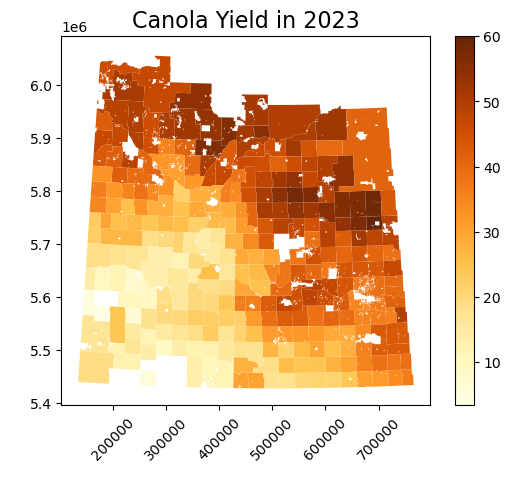

In [31]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the year 2023 and plot the 'Canola' column
final_df_2023 = final_df[final_df['Year'] == 2023]
# cmap = 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r'
final_df_2023.plot(column='Canola', cmap='YlOrBr', legend=True)

# Customize the plot title and axis labels
plt.title('Canola Yield in 2023', color='black', size=16)
plt.xlabel('X Label', color='white')  # Replace 'X Label' with appropriate label
plt.ylabel('Y Label', color='white')  # Replace 'Y Label' with appropriate label

plt.xticks(rotation=45)  # Represent the numerical values of the x-axis variable. Rotate x-axis labels for better visibility

# Display the plot
plt.show()


## The follwoing plots provide a visual representation of Sascatchewan canola yield data from 2020 to 2023.

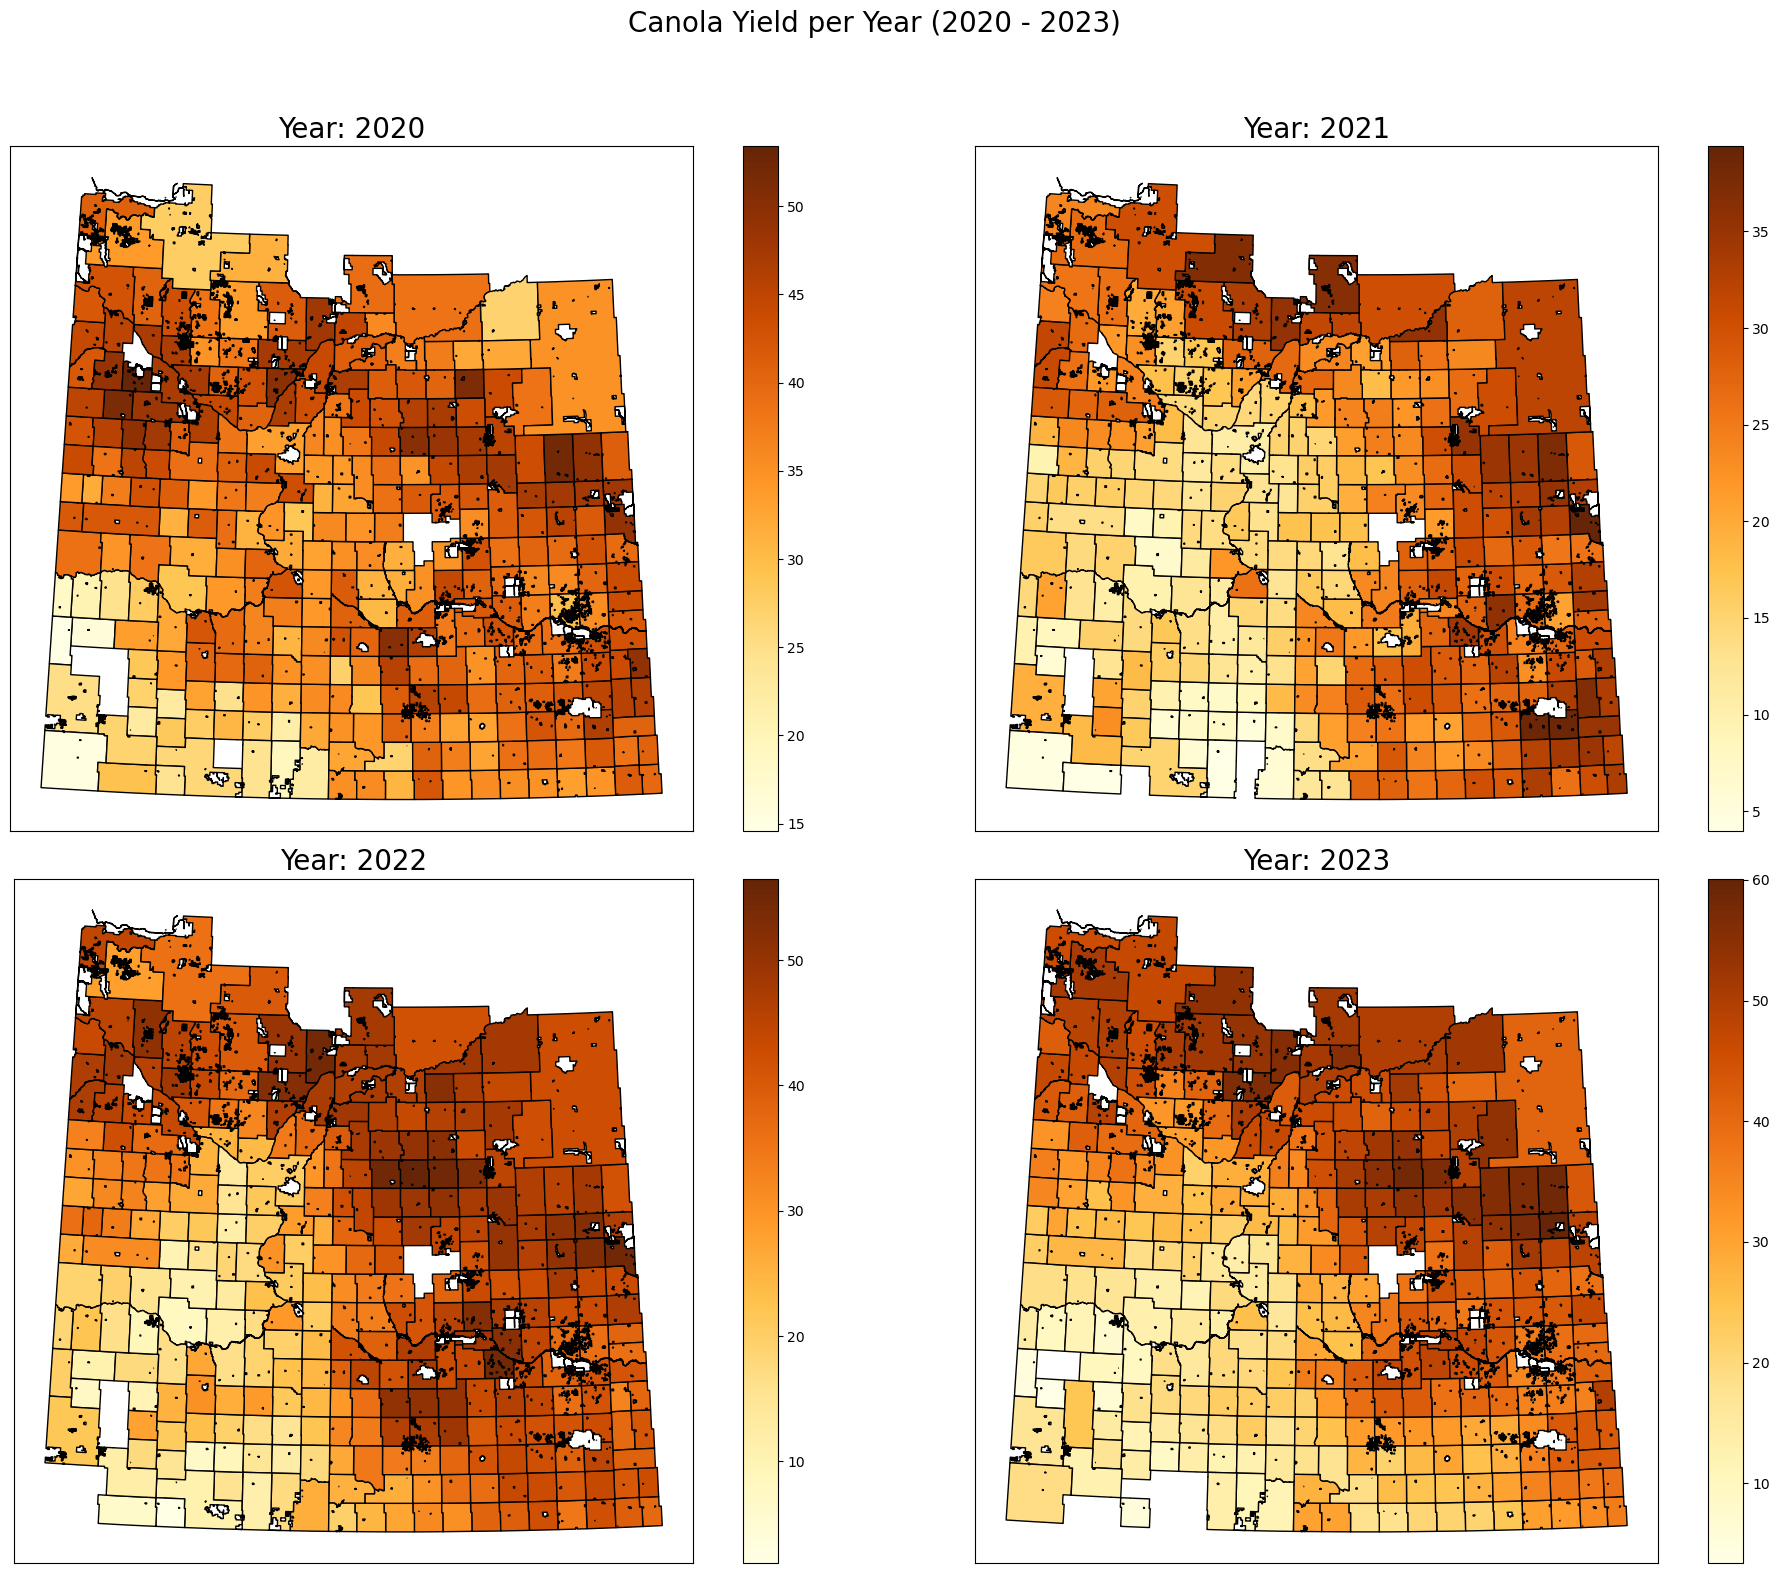

In [32]:
# List of crops to include in plots
#crops = ['Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley', 'Canola']
crops = ['Canola']

# List of years to include in subplots
years = list(range(2020, 2023 + 1))

# Function to plot yield data for a specific crop
def plot_yield_by_year(crop):
    # Set up the figure with 2 rows and 2 columns for the 20 subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle(f'{crop} Yield per Year (2020 - 2023)', color='black', size=20)
    
    # Flatten the axs array for easy indexing
    axs = axs.flatten()

    # Loop through each year and plot it on its respective subplot
    for i, year in enumerate(years):
        ax = axs[i]
        gdf_rm_yield[gdf_rm_yield['Year'] == year].plot(
            column=crop,
            cmap='YlOrBr',
            legend=True,
            ax=ax,
            edgecolor='black'
        )
        ax.set_title(f'Year: {year}', color='black', size=20)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
    
    # Adjust the spacing between subplots for readability
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Generate plots for each crop
for crop in crops:
    plot_yield_by_year(crop)

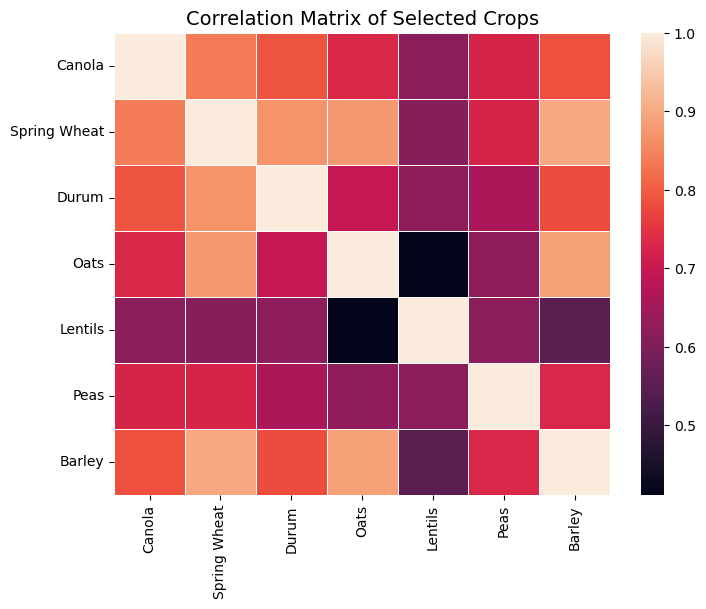

In [33]:
# Select the columns representing the crops of interest
selected_crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']
crop_data = final_df[selected_crops]

# Calculate the correlation matrix
correlation_matrix = crop_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Crops', fontsize=14)

# Display the heatmap
plt.show()


## Correlation Coefficient Interpretation

- **1**: Perfect Positive Correlation
- **0.7 to 0.99**: Strong Positive Correlation
- **0.4 to 0.69**: Moderate Positive Correlation
- **0.1 to 0.39**: Weak Positive Correlation
